In [41]:
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

## Creating data to view and fit

In [42]:
n_samples = 1000
# Create circles
X, Y = make_circles(n_samples, noise=0.03, random_state=42)

In [43]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [44]:
# Check the labels
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [45]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': Y})

In [46]:
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


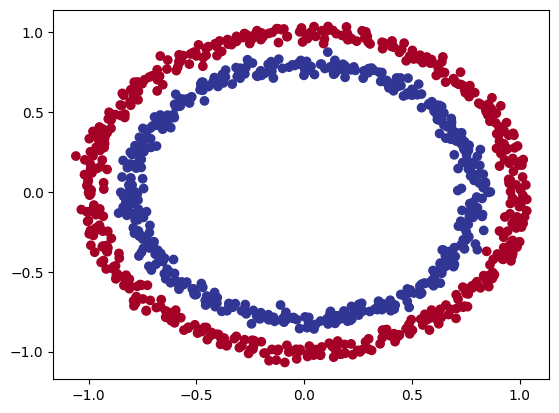

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [48]:
X.shape, Y.shape

((1000, 2), (1000,))

## Modelling

In [49]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, Y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.4261 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 2.3907 - accuracy: 0.4840
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7475 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7091 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4990


In [50]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, Y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, Y)   

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [51]:
# Try adding another layer
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, Y, epochs=100, verbose=0)

In [52]:
# Evaluate the model
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932433247566223, 0.5]

## Improving the model

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [54]:
# 3. Fit the model
model_3.fit(X, Y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.0089 - accuracy: 0.4470
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7851 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7365 - accuracy: 0.4630
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7159 - accuracy: 0.4500
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7043 - accuracy: 0.4300
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4320
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4510
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4920
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4560
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4970
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4770
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4600
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4630
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4640
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4450
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5020
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4790
Epoch 93/100


We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

    🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

    Takes in a trained model, features (X) and labels (y).
    Creates a meshgrid of the different X values.
    Makes predictions across the meshgrid.
    Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

    🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.


In [55]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
 # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
    y_pred = model.predict(x_in)

  # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


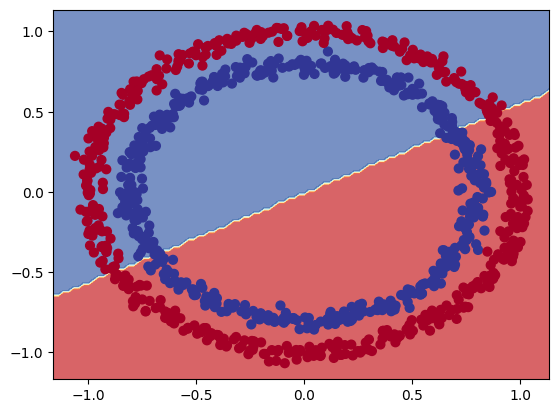

In [56]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, Y)

## Trying on a regression problem

In [57]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [58]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 430.9769 - mae: 430.9769
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 332.3461 - mae: 332.3461
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 235.6748 - mae: 235.6748
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 133.3188 - mae: 133.3188
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 50.3224 - mae: 50.3224
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 80.3459 - mae: 80.3459
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 76.1127 - mae: 76.1127
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 48.0743 - mae: 48.0743
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.1109 - mae: 48.1109
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 45.2504 - mae: 45.2504
Epoch 11/100
5/5 [==============================] -

5/5 [==============================] - 0s 2ms/step - loss: 39.2250 - mae: 39.2250
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 39.4620 - mae: 39.4620
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1488 - mae: 39.1488
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1472 - mae: 39.1472
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 38.9776 - mae: 38.9776
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 39.2180 - mae: 39.2180
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 39.5721 - mae: 39.5721
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.7869 - mae: 38.7869
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 39.3285 - mae: 39.3285
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 39.0155 - mae: 39.0155
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

In [59]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

2/2 [==============================] - 0s 2ms/step


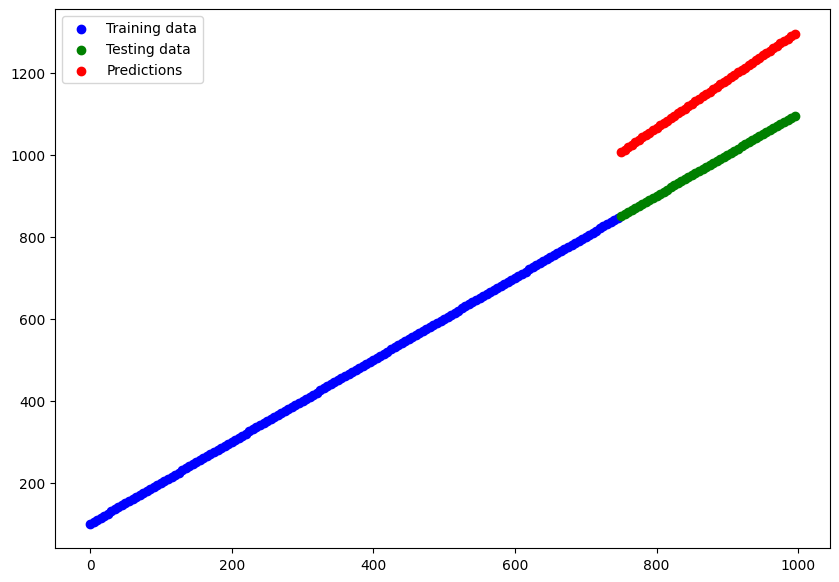

In [60]:
# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

## The missing piece: Non-linearity

In [61]:
tf.random.set_seed(42)

In [62]:
# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 6.2574 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2549 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2454 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2118 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1880 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1983 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1596 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1582 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1577 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1570 - accuracy: 0.4850
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 5.2120 - accuracy: 0.4760
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 5.2063 - accuracy: 0.4750
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1949 - accuracy: 0.4760
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1637 - accuracy: 0.4740
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1592 - accuracy: 0.4730
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1566 - accuracy: 0.4730
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1460 - accuracy: 0.4740
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 5.1059 - accuracy: 0.4730
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 5.0701 - accuracy: 0.4710
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 4.9306 - accuracy: 0.4710
Epoch 93/100


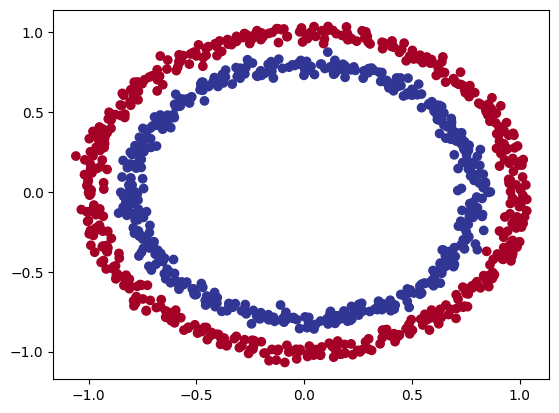

In [63]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 921us/step
doing binary classifcation...


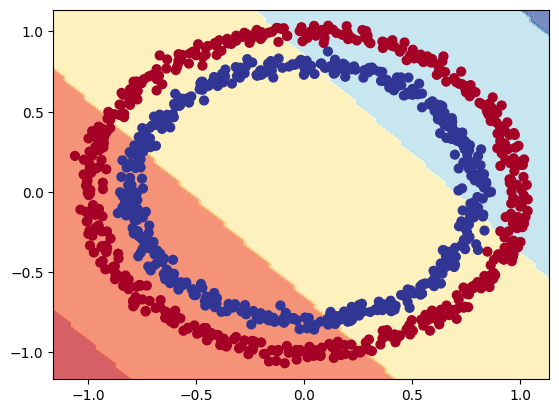

In [64]:
# Check the decision boundary
plot_decision_boundary(model=model_4, X=X, y=Y)

## Trying to build a model with non-linear function

In [65]:
tf.random.set_seed(42)

In [66]:
# Create model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_5.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 5.6717 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6379 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6155 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6007 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5889 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5750 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.5330 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4826 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.4714 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.3695 - accuracy: 0.4790
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 4.5212 - accuracy: 0.4660
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5202 - accuracy: 0.4660
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5193 - accuracy: 0.4670
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5184 - accuracy: 0.4660
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5174 - accuracy: 0.4670
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5165 - accuracy: 0.4670
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5155 - accuracy: 0.4670
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5146 - accuracy: 0.4670
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5136 - accuracy: 0.4650
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5127 - accuracy: 0.4650
Epoch 93/100


313/313 [==============================] - 0s 833us/step
doing binary classifcation...


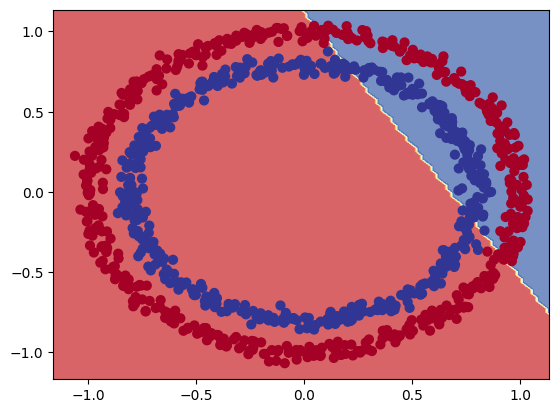

In [67]:
# Check the decision boundary
plot_decision_boundary(model=model_5, X=X, y=Y)

In [74]:
tf.random.set_seed(42)

# Create model with non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.8971 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.3720 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1846 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0234 - accuracy: 0.4440
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9397 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8927 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8588 - accuracy: 0.4660
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8314 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8089 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7902 - accuracy: 0.4330
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8620
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8630
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8660
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8570
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8640
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8640
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8660
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8570
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8570
Epoch 92/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8690
Epoch 93/100


In [75]:
model_6.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8760


[0.3436369299888611, 0.8759999871253967]

313/313 [==============================] - 0s 991us/step
doing binary classifcation...


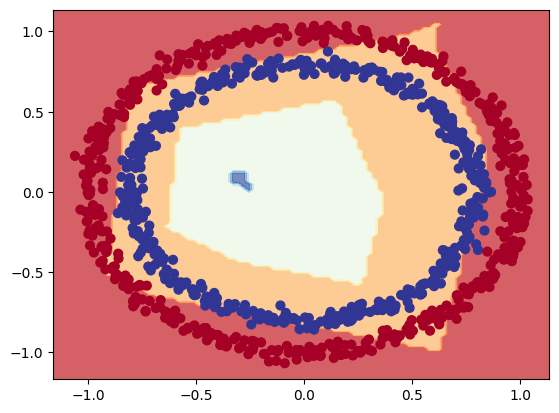

In [76]:
# Check the decision boundary
plot_decision_boundary(model=model_6, X=X, y=Y)

In [71]:
tf.random.set_seed(42)

In [72]:
# Create model with non-linear activation
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile model (typing tf.keras.optimizers.Adam() allows to set up parameters)
model_7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, Y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.6897 - accuracy: 0.4980
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5040
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5010
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5070
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5120
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5130
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5090
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5120
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5200
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5190
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.9410
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.9600
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.9570
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.9570
Epoch 87/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.9570
Epoch 88/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.9590
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.9670
Epoch 90/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.9580
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.9750
Epoch 92/250
32/32 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.9770
Epoch 93/250


32/32 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.9970
Epoch 165/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.9970
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9970
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.9960
Epoch 168/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.9970
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.9960
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9970
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9970
Epoch 172/250
32/32 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9970
Epoch 173/250
32/32 [==============================] - 0s 1ms/step - loss: 0.1040 - accuracy: 0.9970
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.9980
Epoch 246/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9980
Epoch 247/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 0.9970
Epoch 248/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9980
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9980
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9980


313/313 [==============================] - 0s 901us/step
doing binary classifcation...


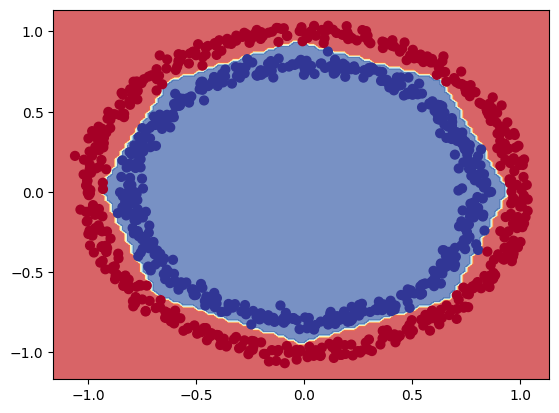

In [73]:
# Check the decision boundary
plot_decision_boundary(model=model_7, X=X, y=Y)

## Exploring even more non linearity

In [77]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

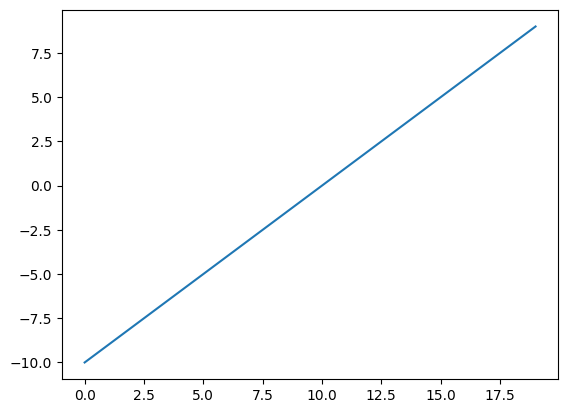

In [78]:
# Visualize the toy tensor
plt.plot(A)

In [83]:
# Replicating sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [80]:
# Use the sigmoid function on A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

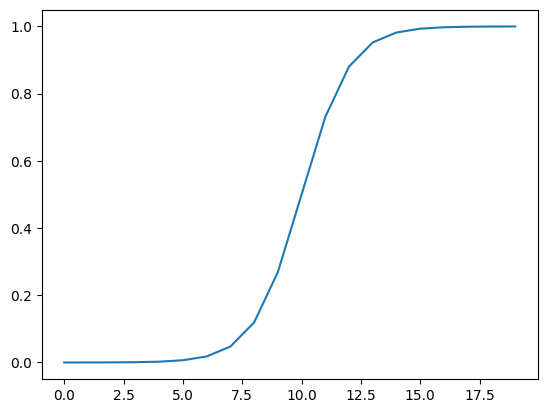

In [81]:
# Plot A transformed by sigmoid
plt.plot(sigmoid(A))

In [86]:
# Replicating ReLu
def relu(x):
    return tf.maximum(0, x)

In [87]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

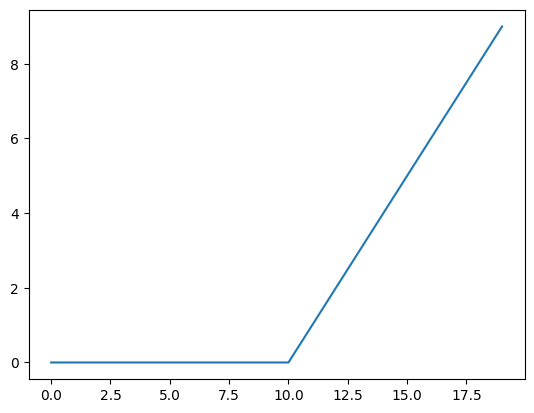

In [88]:
# Plot A transformed by ReLu
plt.plot(relu(A))

In [89]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

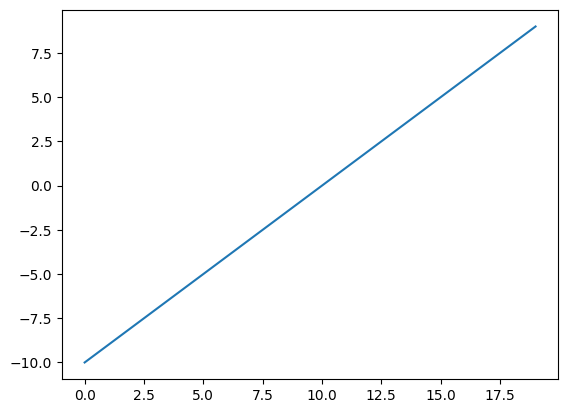

In [90]:
plt.plot(tf.keras.activations.linear(A))

In [91]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>